## Autotune

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import sys
import keras_tuner as kt

from tensorflow import keras
from keras import layers
from keras.models import Sequential


print(sys.version)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
Num GPUs Available:  1


### define model & learning hyperparameters

In [2]:
data_dir = "data/Augmented"

batch_size = 32
img_height = 100
img_width = 100

epochs = 100

#BUFFER_SIZE = BATCH_SIZE*20
#EVALUATION_INTERVAL = round(len(labels)/BATCH_SIZE)
#EVALUATION_TIME = round(EVALUATION_INTERVAL / 10)

## Load and Preprocess Dataset

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1365 files belonging to 8 classes.
Using 1092 files for training.
Found 1365 files belonging to 8 classes.
Using 273 files for validation.


In [4]:
class_names = train_ds.class_names
print(class_names)

num_classes = len(class_names)

#AUTOTUNE
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

['1', '2', '3', '4', '5', '6', '7', 'Overripen']


## Build the model

In [5]:
#Create Model
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0),
  layers.Conv2D(224, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Conv2D(160, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Dense(240, activation='relu'),
  layers.Dropout(0.15),
  layers.Flatten(),
  layers.Dense(num_classes)
])

#Compiling Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 100, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 224)       129248    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 224)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 224)       0

## Train the model

In [6]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


#Train
epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cp_callback]
)

Epoch 1/100
35/35 [==============================] - 7s 29ms/step - loss: 1.9302 - accuracy: 0.2949 - val_loss: 1.9269 - val_accuracy: 0.2821
Epoch 2/100
35/35 [==============================] - 1s 18ms/step - loss: 1.8457 - accuracy: 0.3104 - val_loss: 1.9161 - val_accuracy: 0.2821
Epoch 3/100
35/35 [==============================] - 1s 18ms/step - loss: 1.8325 - accuracy: 0.3114 - val_loss: 1.9031 - val_accuracy: 0.2821
Epoch 4/100
35/35 [==============================] - 1s 18ms/step - loss: 1.8201 - accuracy: 0.3123 - val_loss: 1.8793 - val_accuracy: 0.2821
Epoch 5/100
35/35 [==============================] - 1s 18ms/step - loss: 1.7454 - accuracy: 0.3846 - val_loss: 1.7447 - val_accuracy: 0.4432
Epoch 6/100
35/35 [==============================] - 1s 18ms/step - loss: 1.5083 - accuracy: 0.4954 - val_loss: 1.4393 - val_accuracy: 0.4725
Epoch 7/100
35/35 [==============================] - 1s 18ms/step - loss: 1.2506 - accuracy: 0.5220 - val_loss: 1.2811 - val_accuracy: 0.4799
Epoch 

35/35 [==============================] - ETA: 0s - loss: 0.2700 - accuracy: 0.90 - 1s 18ms/step - loss: 0.2693 - accuracy: 0.9048 - val_loss: 0.4221 - val_accuracy: 0.8315
Epoch 59/100
35/35 [==============================] - 1s 18ms/step - loss: 0.2635 - accuracy: 0.9029 - val_loss: 0.3648 - val_accuracy: 0.8498
Epoch 60/100
35/35 [==============================] - 1s 18ms/step - loss: 0.2976 - accuracy: 0.8736 - val_loss: 0.3854 - val_accuracy: 0.8425
Epoch 61/100
35/35 [==============================] - 1s 18ms/step - loss: 0.2891 - accuracy: 0.8901 - val_loss: 0.3834 - val_accuracy: 0.8388
Epoch 62/100
35/35 [==============================] - ETA: 0s - loss: 0.2567 - accuracy: 0.90 - 1s 17ms/step - loss: 0.2592 - accuracy: 0.9029 - val_loss: 0.3654 - val_accuracy: 0.8498
Epoch 63/100
35/35 [==============================] - 1s 18ms/step - loss: 0.2762 - accuracy: 0.8874 - val_loss: 0.4482 - val_accuracy: 0.7985
Epoch 64/100
35/35 [==============================] - 1s 18ms/step - lo

## Visualisation


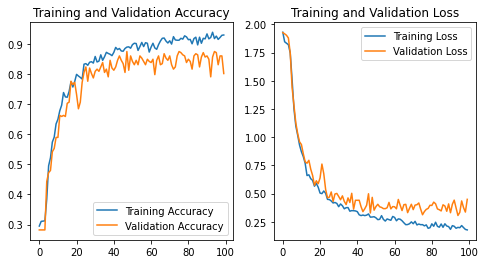

In [7]:

#visualize
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


## Load best model


In [8]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img.astype("uint8"))

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(8))
  plt.yticks([])
  thisplot = plt.bar(range(8), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Loads the weights
model.load_weights(checkpoint_path)

# Re-evaluate the model
loss, acc = model.evaluate(val_ds, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))


#for images, labels in val_ds:  # only take first element of dataset

numpy_labels = np.concatenate([y for x, y in val_ds], axis=0)
    #create probability model
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(val_ds)
    # Plot the first X test images, their predicted labels, and the true labels.
    # Color correct predictions in blue and incorrect predictions in red.
   
pred = np.argmax(predictions, axis=-1)

9/9 - 0s - loss: 0.3284 - accuracy: 0.8755
Restored model, accuracy: 87.55%


# Visualise Prediction

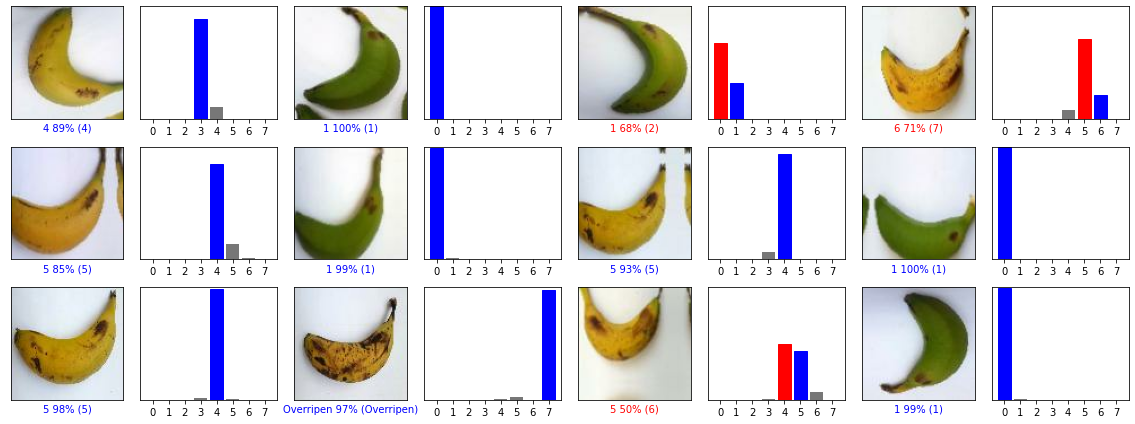

In [9]:
for images, labels in val_ds.take(1):
    num_cols = 4
    num_rows = 3
    num_images = num_rows*num_cols
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions[i], numpy_labels, numpy_images)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions[i], numpy_labels)
        plt.tight_layout()
    plt.show()

[[77  0  0  0  0  0  0  0]
 [ 7 20  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0]
 [ 0  0  0 32  0  0  0  0]
 [ 0  0  0  1 35  5  0  1]
 [ 0  0  0  0  1 43  2  0]
 [ 0  0  0  0  0  7  2  0]
 [ 0  0  0  0  0  0  0 30]]
0.9120879120879121
0.8885182469859889
0.9120879120879121
0.9057752441008213


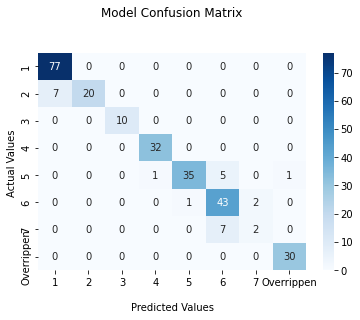

In [10]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import seaborn as sns

numpy_labels = np.concatenate([y for x, y in val_ds], axis=0)

cf_matrix = confusion_matrix(numpy_labels, pred)

print(cf_matrix)
print(metrics.accuracy_score(numpy_labels, pred))
print(metrics.precision_score(numpy_labels, pred, average='macro'))
print(metrics.recall_score(numpy_labels, pred, average='micro'))
print(metrics.f1_score(numpy_labels, pred, average='weighted'))

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Model Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([ 1 , 2, 3, 4, 5, 6, 7, 'Overrippen'])
ax.yaxis.set_ticklabels([1 , 2, 3, 4, 5, 6, 7, 'Overrippen'])

## Display the visualization of the Confusion Matrix.
plt.show()